In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [2]:
from evaluator.tester import Tester, train_ds, val_ds, test_ds

e:\RUSHIL\Courses\Agentic_AI\AI_Engineer_Core\ai-pricer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
# Support vector regressor model
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVR

documents = [item.summary for item in train_ds]
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
model = SVR()

x_train = vectorizer.fit_transform(documents)
y_train = np.array([float(item.price) for item in train_ds])
model.fit(x_train, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [4]:
from models.item import Item


def support_vector_regression(item: Item) -> float:
    summary = item.summary
    x = vectorizer.transform([summary])
    y = (model.predict(x))[0]
    return max(0, float(y))

1: Guess: $19.44 Truth: $35.00 Error: $15.56 SLE: 0.32 Item: Small Soar Dove Bird Necklace, Delicate ...
2: Guess: $27.33 Truth: $25.00 Error: $2.33 SLE: 0.01 Item: Omaha Steaks Gift Card
3: Guess: $22.06 Truth: $285.00 Error: $262.94 SLE: 6.34 Item: Ohana Baritone Ukulele Model BK-20CE
4: Guess: $15.35 Truth: $4.88 Error: $10.47 SLE: 1.05 Item: BodyGuardz - Pure 2 Edge Glass Screen Pr...
5: Guess: $15.76 Truth: $5.00 Error: $10.76 SLE: 1.06 Item: Numer 1 Dad Iron On Decal, Father's Day ...
6: Guess: $14.56 Truth: $16.99 Error: $2.43 SLE: 0.02 Item: I Love My Maltese Rhinestone Iron on Tra...
7: Guess: $25.03 Truth: $84.99 Error: $59.96 SLE: 1.43 Item: JJ Electronics Amplifier Tubes (T-EL84-J...
8: Guess: $21.62 Truth: $18.99 Error: $2.63 SLE: 0.02 Item: Women’s Satin Kimono Robe for Bridesmaid...
9: Guess: $21.06 Truth: $22.08 Error: $1.02 SLE: 0.00 Item: Monoprice PLA Plus+ Premium 3D Filament ...
10: Guess: $20.77 Truth: $39.98 Error: $19.21 SLE: 0.40 Item: LOVEVOOK Laptop Backpack 

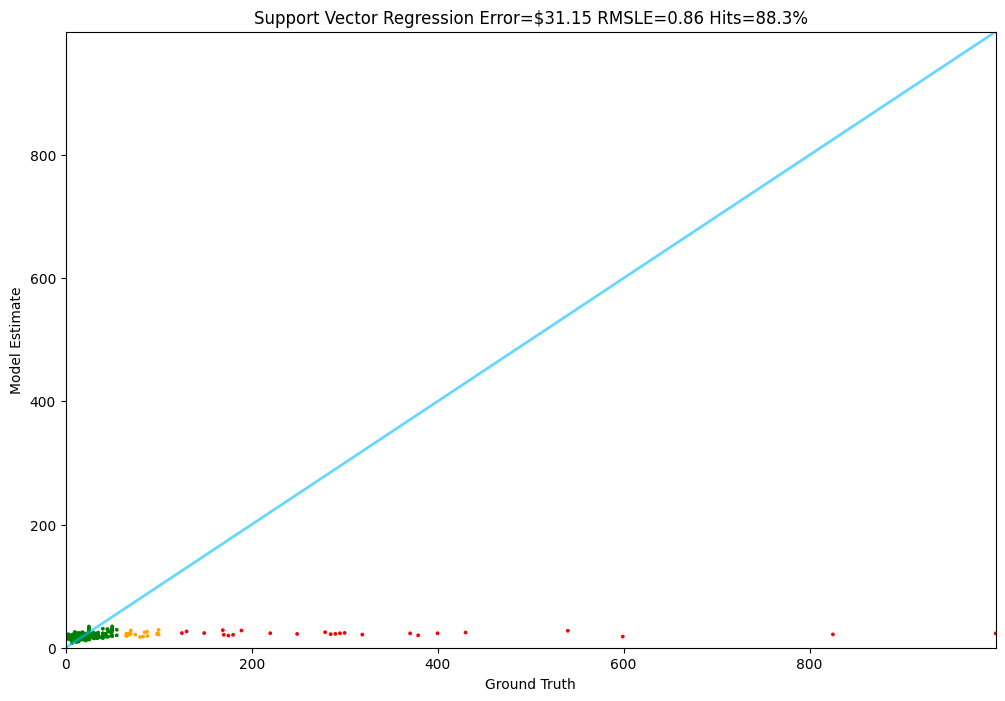

In [5]:
Tester.test(support_vector_regression)